---
Hàm này vẽ được hình (Input chỉ định)
---

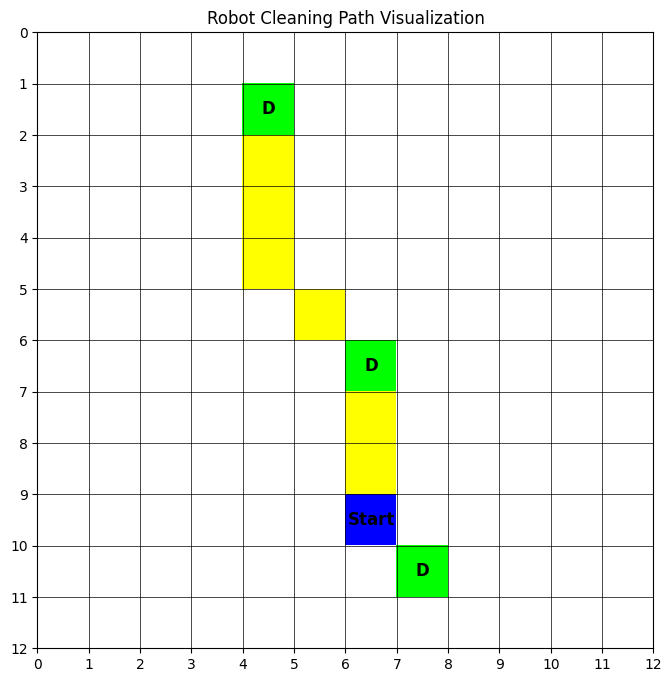

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Kích thước ma trận
m, n = 12, 12  # Số hàng và cột của ma trận (tùy chỉnh theo yêu cầu)

# Tọa độ các ô rác và ô bắt đầu
dirty_cells = [(10, 7), (6, 6), (1, 4)]
start_cell = (9, 6)
path = [(10, 7), (10, 7), (9, 6), (8, 6), (7, 6), (6, 6), (6, 6), (5, 5), (4, 4), (3, 4), (2, 4), (1, 4)]

# Tạo ma trận màu ban đầu và thiết lập màu trắng cho nền
grid = np.ones((m, n, 3))  # Ma trận màu trắng (1, 1, 1)

# Đặt màu cho các ô rác - xanh lá cây
for cell in dirty_cells:
    grid[cell[0], cell[1]] = [0, 1, 0]  # Xanh lá cây

# Đặt màu cho ô bắt đầu - xanh nước biển
grid[start_cell[0], start_cell[1]] = [0, 0, 1]  # Xanh nước biển

# Đặt màu cho các ô trong đường đi của robot - vàng
for cell in path:
    if cell not in dirty_cells and cell != start_cell:
        grid[cell[0], cell[1]] = [1, 1, 0]  # Vàng

# Vẽ ma trận bằng matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(grid, origin='upper')

# Thêm các đường lưới và nhãn tọa độ
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.xticks(np.arange(-0.5, n, 1), labels=np.arange(0, n+1, 1))
plt.yticks(np.arange(-0.5, m, 1), labels=np.arange(0, m+1, 1))
plt.gca().set_xticks(np.arange(0.5, n, 1), minor=True)
plt.gca().set_yticks(np.arange(0.5, m, 1), minor=True)
plt.gca().grid(which='minor', color='black', linestyle='-', linewidth=0.5)

# Đánh dấu tọa độ các ô rác và ô bắt đầu
plt.text(start_cell[1], start_cell[0], 'Start', ha='center', va='center', color='black', fontsize=12, weight='bold')
for cell in dirty_cells:
    plt.text(cell[1], cell[0], 'D', ha='center', va='center', color='black', fontsize=12, weight='bold')

# Thêm tiêu đề và hiển thị kết quả
plt.title("Robot Cleaning Path Visualization")
plt.axis('on')
plt.show()


---
Hàm này in ra kết quả 
---

Dirty cell coordinates:
(1, 7)
(4, 4)
(7, 3)
Start cell coordinates:
(8, 5)
Lộ trình robot đi qua:
['(9, 6)', '(8, 5)', '(7, 4)', '(7, 3)', '(7, 3)', '(6, 4)', '(5, 4)', '(4, 4)', '(4, 4)', '(3, 5)', '(2, 6)', '(1, 7)']
Tổng chi phí: 24


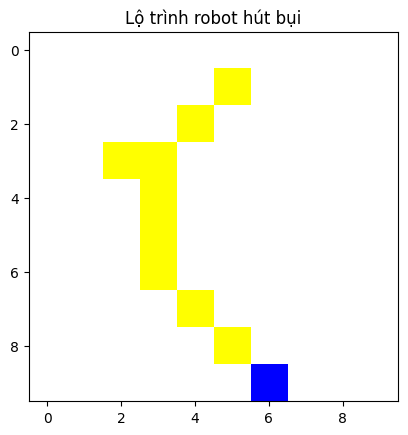

In [37]:
import random
import matplotlib.pyplot as plt
import numpy as np
import heapq

# Lớp biểu diễn tọa độ (x, y)
class Position:
    def __init__(self, x, y):
        self.x = x
        self.y = y

# Lớp biểu diễn các ô trong ma trận
class Cell:
    def __init__(self, position, parent=None, status='free', g=0, h=0):
        self.position = position
        self.parent = parent
        self.status = status  # {'free', 'start', 'dirty', 'clean'}
        self.g = g  # chi phí hiện tại đến ô này
        self.h = h  # chi phí ước lượng đến ô đích
        self.f = g + h  # tổng chi phí

    def __lt__(self, other):
        return self.f < other.f

# Hàm tính khoảng cách Manhattan giữa hai điểm
def heuristic(p1, p2):
    return abs(p1.x - p2.x) + abs(p1.y - p2.y)

# Lấy tất cả ô liền kề trong khung 3x3
def get_neighbors(cell, grid, m, n):
    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    neighbors = []
    for d in directions:
        nx, ny = cell.position.x + d[0], cell.position.y + d[1]
        if 0 <= nx < m and 0 <= ny < n:
            neighbors.append(grid[nx][ny])
    return neighbors

# Thuật toán A* để tìm lộ trình
def a_star_cleaning(grid, start, dirty_cells, m, n):
    open_list = []
    closed_list = set()
    heapq.heappush(open_list, (start.f, start))
    path = []
    total_cost = 0

    while dirty_cells:
        _, current = heapq.heappop(open_list)
        closed_list.add((current.position.x, current.position.y))
        path.append(current.position)

        # Nếu đến ô bẩn, làm sạch nó
        if current in dirty_cells:
            
            dirty_cells.remove(current)
            current.status = 'clean'
            total_cost += current.g

            # Reset danh sách mở và đóng
            open_list = []
            closed_list = set()
            heapq.heappush(open_list, (current.f, current))
            continue

        # Tìm các ô liền kề
        for neighbor in get_neighbors(current, grid, m, n):
            if (neighbor.position.x, neighbor.position.y) in closed_list:
                continue

            tentative_g = current.g + 1

            if tentative_g < neighbor.g or (neighbor.f, neighbor) not in open_list:
                neighbor.g = tentative_g
                neighbor.h = min(heuristic(neighbor.position, dirty.position) for dirty in dirty_cells)
                neighbor.f = neighbor.g + neighbor.h
                neighbor.parent = current

                if (neighbor.f, neighbor) not in open_list:
                    heapq.heappush(open_list, (neighbor.f, neighbor))      

        # Tăng chi phí cho mỗi ô bẩn còn lại
        for dirty in dirty_cells:
            dirty.g += 1

    return path, total_cost

# Tạo ma trận với các ô bẩn ngẫu nhiên
def create_grid(m, n, num_dirty):
    grid = [[Cell(Position(i, j)) for j in range(n)] for i in range(m)]
    dirty_cells = []

    # Đặt ngẫu nhiên các ô bẩn
    for _ in range(num_dirty):
        x, y = random.randint(0, m-1), random.randint(0, n-1)
        while grid[x][y].status == 'dirty':
            x, y = random.randint(0, m-1), random.randint(0, n-1)
        grid[x][y].status = 'dirty'
        dirty_cells.append(grid[x][y])

    # Đặt vị trí bắt đầu ngẫu nhiên
    start_x, start_y = random.randint(0, m-1), random.randint(0, n-1)
    grid[start_x][start_y].status = 'start'
    start = grid[start_x][start_y]

    print("Dirty cell coordinates:")
    for cell in dirty_cells:
        print(f"({cell.position.x+1}, {cell.position.y+1})")
    print("Start cell coordinates:")
    print(f"({start_x}, {start_y})")

    
    return grid, start, dirty_cells

# Visualize lộ trình với matplotlib
def visualize_path(grid, path, m, n):
    grid_map = np.ones((m, n, 3))

    # Đặt các ô bẩn, điểm bắt đầu, và các ô trong lộ trình
    for row in grid:
        for cell in row:
            if cell.status == 'dirty':
                grid_map[m - cell.position.x - 1, cell.position.y] = [0, 0, 1]  # Ô bẩn (xanh nước biển)
            elif cell.status == 'start':
                grid_map[m - cell.position.x - 1, cell.position.y] = [0, 1, 0]  # Điểm bắt đầu (xanh lá cây)

    # Đánh dấu lộ trình di chuyển (màu vàng)
    for pos in path[:-1]:  # Trừ ô bẩn cuối cùng
        grid_map[m - pos.x - 1, pos.y] = [1, 1, 0]  # Ô đi qua (vàng)
    
    # Đánh dấu ô bẩn cuối cùng đã dọn sạch (xanh nước biển)
    final_pos = path[-1]
    grid_map[m - final_pos.x - 1, final_pos.y] = [0, 0, 1]

    plt.imshow(grid_map, interpolation='nearest')
    plt.title("Lộ trình robot hút bụi")
    plt.show()

def main():
    m = int(input("Nhập số hàng (m): "))
    n = int(input("Nhập số cột (n): "))
    num_dirty = int(input("Nhập số lượng ô bẩn: "))

    grid, start, dirty_cells = create_grid(m, n, num_dirty)
    path, total_cost = a_star_cleaning(grid, start, dirty_cells, m, n)

    print("Lộ trình robot đi qua:")
    print([f"({pos.x+1}, {pos.y+1})" for pos in path])
    print(f"Tổng chi phí: {total_cost}")

    visualize_path(grid, path, m, n)

if __name__ == "__main__":
    main()


---
Kết hợp tất cả các code
---

Dirty cell coordinates:
(4, 8)
(7, 5)
(9, 8)
Start cell coordinates:
(4, 3)
Lộ trình robot đi qua:
['(5, 4)', '(6, 5)', '(7, 5)', '(7, 5)', '(8, 6)', '(9, 7)', '(9, 8)', '(9, 8)', '(8, 8)', '(7, 8)', '(6, 8)', '(5, 8)', '(4, 8)']
Tổng chi phí: 23
[<__main__.Cell object at 0x000002A6F8BEC7A0>, <__main__.Cell object at 0x000002A6F8BED5E0>, <__main__.Cell object at 0x000002A6F8BECF50>]


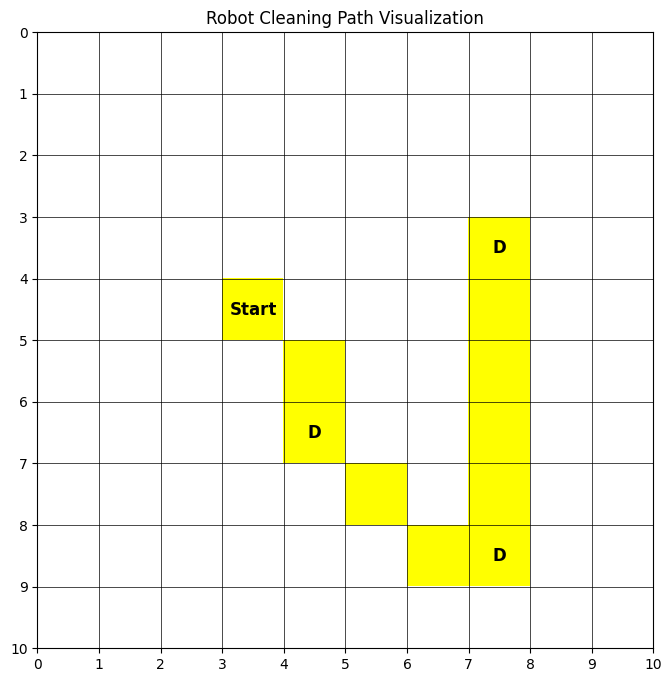

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import heapq

# Lớp biểu diễn tọa độ (x, y)
class Position:
    def __init__(self, x, y):
        self.x = x
        self.y = y

# Lớp biểu diễn các ô trong ma trận
class Cell:
    def __init__(self, position, parent=None, status='free', g=0, h=0):
        self.position = position
        self.parent = parent
        self.status = status  # {'free', 'start', 'dirty', 'clean'}
        self.g = g  # chi phí hiện tại đến ô này
        self.h = h  # chi phí ước lượng đến ô đích
        self.f = g + h  # tổng chi phí

    def __lt__(self, other):
        return self.f < other.f

# Hàm tính khoảng cách Manhattan giữa hai điểm
def heuristic(p1, p2):
    return abs(p1.x - p2.x) + abs(p1.y - p2.y)

# Lấy tất cả ô liền kề trong khung 3x3
def get_neighbors(cell, grid, m, n):
    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    neighbors = []
    for d in directions:
        nx, ny = cell.position.x + d[0], cell.position.y + d[1]
        if 0 <= nx < m and 0 <= ny < n:
            neighbors.append(grid[nx][ny])
    return neighbors

# Thuật toán A* để tìm lộ trình
def a_star_cleaning(grid, start, dirty_cells, m, n):
    open_list = []
    closed_list = set()
    heapq.heappush(open_list, (start.f, start))
    path = []
    total_cost = 0

    while dirty_cells:
        _, current = heapq.heappop(open_list)
        closed_list.add((current.position.x, current.position.y))
        path.append(current.position)

        # Nếu đến ô bẩn, làm sạch nó
        if current in dirty_cells:
            
            dirty_cells.remove(current)
            current.status = 'clean'
            total_cost += current.g

            # Reset danh sách mở và đóng
            open_list = []
            closed_list = set()
            heapq.heappush(open_list, (current.f, current))
            continue

        # Tìm các ô liền kề
        for neighbor in get_neighbors(current, grid, m, n):
            if (neighbor.position.x, neighbor.position.y) in closed_list:
                continue

            tentative_g = current.g + 1

            if tentative_g < neighbor.g or (neighbor.f, neighbor) not in open_list:
                neighbor.g = tentative_g
                neighbor.h = min(heuristic(neighbor.position, dirty.position) for dirty in dirty_cells)
                neighbor.f = neighbor.g + neighbor.h
                neighbor.parent = current

                if (neighbor.f, neighbor) not in open_list:
                    heapq.heappush(open_list, (neighbor.f, neighbor))      

        # Tăng chi phí cho mỗi ô bẩn còn lại
        for dirty in dirty_cells:
            dirty.g += 1

    return path, total_cost

# Tạo ma trận với các ô bẩn ngẫu nhiên
def create_grid(m, n, num_dirty):
    grid = [[Cell(Position(i, j)) for j in range(n)] for i in range(m)]
    dirty_cells = []
    dirty_cells_vi = []

    # Đặt ngẫu nhiên các ô bẩn
    for _ in range(num_dirty):
        x, y = random.randint(0, m-1), random.randint(0, n-1)
        while grid[x][y].status == 'dirty':
            x, y = random.randint(0, m-1), random.randint(0, n-1)
        grid[x][y].status = 'dirty'
        dirty_cells.append(grid[x][y])
        dirty_cells_vi.append(grid[x][y])

    # Đặt vị trí bắt đầu ngẫu nhiên
    start_x, start_y = random.randint(0, m-1), random.randint(0, n-1)
    grid[start_x][start_y].status = 'start'
    start = grid[start_x][start_y]

    print("Dirty cell coordinates:")
    for cell in dirty_cells:
        print(f"({cell.position.x+1}, {cell.position.y+1})")
    print("Start cell coordinates:")
    print(f"({start_x}, {start_y})")

    
    return grid, start, dirty_cells,dirty_cells_vi

# Visualize lộ trình với matplotlib
# Visualize lộ trình với matplotlib
def visualize_path(grid, path, m, n, dirty_cells_vi, start_cell):
    # Tạo ma trận màu ban đầu và thiết lập màu trắng cho nền
    grid = np.ones((m, n, 3))  # Ma trận màu trắng (1, 1, 1)
    
    # Đặt màu cho các ô rác - xanh lá cây
    for cell in dirty_cells_vi:
        grid[cell.position.x, cell.position.y] = [0, 1, 0]  # Xanh lá cây

    # Đặt màu cho ô bắt đầu - xanh nước biển
    grid[start_cell.position.x, start_cell.position.y] = [0, 0, 1]  # Xanh nước biển

    # Đặt màu cho các ô trong đường đi của robot - vàng
    for cell in path:
        if cell not in dirty_cells_vi and cell != start_cell:
            grid[cell.x, cell.y] = [1, 1, 0]  # Vàng


    # Vẽ ma trận bằng matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(grid, origin='upper')

    # Thêm các đường lưới và nhãn tọa độ
    plt.grid(color='black', linestyle='-', linewidth=0.5)
    plt.xticks(np.arange(-0.5, n, 1), labels=np.arange(0, n+1, 1))
    plt.yticks(np.arange(-0.5, m, 1), labels=np.arange(0, m+1, 1))
    plt.gca().set_xticks(np.arange(0.5, n, 1), minor=True)
    plt.gca().set_yticks(np.arange(0.5, m, 1), minor=True)
    plt.gca().grid(which='minor', color='black', linestyle='-', linewidth=0.5)

    # Đánh dấu tọa độ các ô rác và ô bắt đầu
    plt.text(start_cell.position.y, start_cell.position.x, 'Start', ha='center', va='center', color='black', fontsize=12, weight='bold')
    for cell in dirty_cells_vi:
        plt.text(cell.position.y, cell.position.x, 'D', ha='center', va='center', color='black', fontsize=12, weight='bold')

    # Thêm tiêu đề và hiển thị kết quả
    plt.title("Robot Cleaning Path Visualization")
    plt.axis('on')
    plt.show()

def main():
    m = int(input("Nhập số hàng (m): "))
    n = int(input("Nhập số cột (n): "))
    num_dirty = int(input("Nhập số lượng ô bẩn: "))

    grid, start_cell, dirty_cells, dirty_cells_vi = create_grid(m, n, num_dirty)
    path, total_cost = a_star_cleaning(grid, start_cell, dirty_cells, m, n)

    print("Lộ trình robot đi qua:")
    print([f"({pos.x+1}, {pos.y+1})" for pos in path])
    print(f"Tổng chi phí: {total_cost}")
    print(dirty_cells_vi)

    visualize_path(grid, path, m, n, dirty_cells_vi,start_cell)

if __name__ == "__main__":
    main()


Dirty cell coordinates:
(4, 1)
(10, 4)
(7, 9)
Start cell coordinates:
(8, 2)
Lộ trình robot đi qua:
['(9, 3)', '(10, 4)', '(10, 4)', '(9, 5)', '(8, 6)', '(7, 7)', '(7, 8)', '(7, 9)', '(7, 9)', '(6, 8)', '(5, 7)', '(4, 6)', '(4, 5)', '(4, 4)', '(4, 3)', '(4, 2)', '(4, 1)']
Tổng chi phí: 27
[<__main__.Cell object at 0x000002A6F8B0FDA0>, <__main__.Cell object at 0x000002A68AEDD400>, <__main__.Cell object at 0x000002A68AEDD190>]


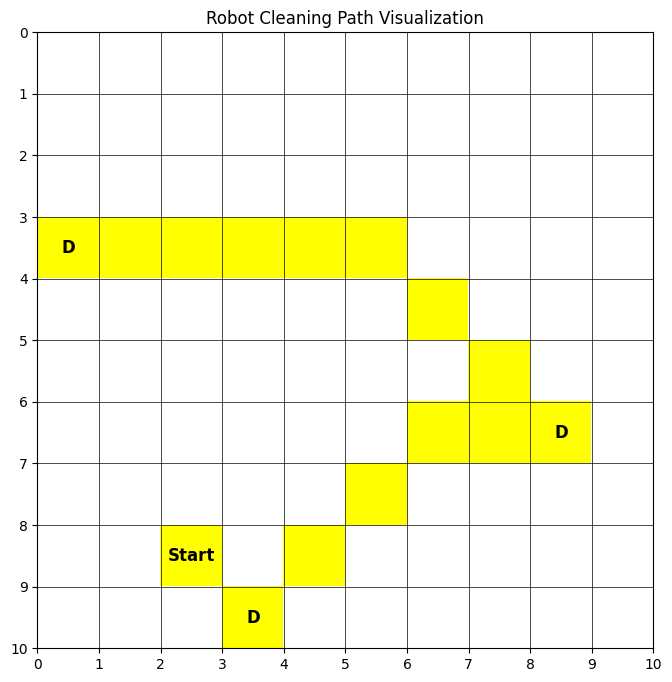

In [44]:
import random
import matplotlib.pyplot as plt
import numpy as np
import heapq

# Lớp biểu diễn tọa độ (x, y)
class Position:
    def __init__(self, x, y):
        self.x = x
        self.y = y

# Lớp biểu diễn các ô trong ma trận
class Cell:
    def __init__(self, position, parent=None, status='free', g=0, h=0):
        self.position = position
        self.parent = parent
        self.status = status  # {'free', 'start', 'dirty', 'clean'}
        self.g = g  # chi phí hiện tại đến ô này
        self.h = h  # chi phí ước lượng đến ô đích
        self.f = g + h  # tổng chi phí

    def __lt__(self, other):
        return self.f < other.f

# Hàm tính khoảng cách Manhattan giữa hai điểm
def heuristic(p1, p2):
    return abs(p1.x - p2.x) + abs(p1.y - p2.y)

# Lấy tất cả ô liền kề trong khung 3x3
def get_neighbors(cell, grid, m, n):
    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    neighbors = []
    for d in directions:
        nx, ny = cell.position.x + d[0], cell.position.y + d[1]
        if 0 <= nx < m and 0 <= ny < n:
            neighbors.append(grid[nx][ny])
    return neighbors

# Thuật toán A* để tìm lộ trình
def a_star_cleaning(grid, start, dirty_cells, m, n):
    open_list = []
    closed_list = set()
    heapq.heappush(open_list, (start.f, start))
    path = []
    total_cost = 0

    while dirty_cells:
        _, current = heapq.heappop(open_list)
        closed_list.add((current.position.x, current.position.y))
        path.append(current.position)

        # Nếu đến ô bẩn, làm sạch nó
        if current in dirty_cells:
            
            dirty_cells.remove(current)
            current.status = 'clean'
            total_cost += current.g

            # Reset danh sách mở và đóng
            open_list = []
            closed_list = set()
            heapq.heappush(open_list, (current.f, current))
            continue

        # Tìm các ô liền kề
        for neighbor in get_neighbors(current, grid, m, n):
            if (neighbor.position.x, neighbor.position.y) in closed_list:
                continue

            tentative_g = current.g + 1

            if tentative_g < neighbor.g or (neighbor.f, neighbor) not in open_list:
                neighbor.g = tentative_g
                neighbor.h = min(heuristic(neighbor.position, dirty.position) for dirty in dirty_cells)
                neighbor.f = neighbor.g + neighbor.h
                neighbor.parent = current

                if (neighbor.f, neighbor) not in open_list:
                    heapq.heappush(open_list, (neighbor.f, neighbor))      

        # Tăng chi phí cho mỗi ô bẩn còn lại
        for dirty in dirty_cells:
            dirty.g += 1

    return path, total_cost

# Tạo ma trận với các ô bẩn ngẫu nhiên
def create_grid(m, n, num_dirty):
    grid = [[Cell(Position(i, j)) for j in range(n)] for i in range(m)]
    dirty_cells = []
    dirty_cells_vi = []

    # Đặt ngẫu nhiên các ô bẩn
    for _ in range(num_dirty):
        x, y = random.randint(0, m-1), random.randint(0, n-1)
        while grid[x][y].status == 'dirty':
            x, y = random.randint(0, m-1), random.randint(0, n-1)
        grid[x][y].status = 'dirty'
        dirty_cells.append(grid[x][y])
        dirty_cells_vi.append(grid[x][y])

    # Đặt vị trí bắt đầu ngẫu nhiên
    start_x, start_y = random.randint(0, m-1), random.randint(0, n-1)
    grid[start_x][start_y].status = 'start'
    start = grid[start_x][start_y]

    print("Dirty cell coordinates:")
    for cell in dirty_cells:
        print(f"({cell.position.x+1}, {cell.position.y+1})")
    print("Start cell coordinates:")
    print(f"({start_x}, {start_y})")

    
    return grid, start, dirty_cells,dirty_cells_vi

# Visualize lộ trình với matplotlib
# Visualize lộ trình với matplotlib
def visualize_path(grid, path, m, n, dirty_cells_vi, start_cell):
    # Tạo ma trận màu ban đầu và thiết lập màu trắng cho nền
    grid = np.ones((m, n, 3))  # Ma trận màu trắng (1, 1, 1)
    
    # Đặt màu cho các ô rác - xanh lá cây
    for cell in dirty_cells_vi:
        grid[cell.position.x, cell.position.y] = [0, 1, 0]  # Xanh lá cây

    # Đặt màu cho ô bắt đầu - xanh nước biển
    grid[start_cell.position.x, start_cell.position.y] = [0, 0, 1]  # Xanh nước biển

    # Đặt màu cho các ô trong đường đi của robot - vàng
    for cell in path:
        grid[cell.x, cell.y] = [1, 1, 0]  # Vàng
        if cell in dirty_cells_vi:
            grid[cell.position.x, cell.position.y] = [0, 1, 0]  # Xanh lá cây


    # Vẽ ma trận bằng matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(grid, origin='upper')

    # Thêm các đường lưới và nhãn tọa độ
    plt.grid(color='black', linestyle='-', linewidth=0.5)
    plt.xticks(np.arange(-0.5, n, 1), labels=np.arange(0, n+1, 1))
    plt.yticks(np.arange(-0.5, m, 1), labels=np.arange(0, m+1, 1))
    plt.gca().set_xticks(np.arange(0.5, n, 1), minor=True)
    plt.gca().set_yticks(np.arange(0.5, m, 1), minor=True)
    plt.gca().grid(which='minor', color='black', linestyle='-', linewidth=0.5)

    # Đánh dấu tọa độ các ô rác và ô bắt đầu
    plt.text(start_cell.position.y, start_cell.position.x, 'Start', ha='center', va='center', color='black', fontsize=12, weight='bold')
    for cell in dirty_cells_vi:
        plt.text(cell.position.y, cell.position.x, 'D', ha='center', va='center', color='black', fontsize=12, weight='bold')

    # Thêm tiêu đề và hiển thị kết quả
    plt.title("Robot Cleaning Path Visualization")
    plt.axis('on')
    plt.show()

def main():
    m = int(input("Nhập số hàng (m): "))
    n = int(input("Nhập số cột (n): "))
    num_dirty = int(input("Nhập số lượng ô bẩn: "))

    grid, start_cell, dirty_cells, dirty_cells_vi = create_grid(m, n, num_dirty)
    path, total_cost = a_star_cleaning(grid, start_cell, dirty_cells, m, n)

    print("Lộ trình robot đi qua:")
    print([f"({pos.x+1}, {pos.y+1})" for pos in path])
    print(f"Tổng chi phí: {total_cost}")
    print(dirty_cells_vi)

    visualize_path(grid, path, m, n, dirty_cells_vi,start_cell)

if __name__ == "__main__":
    main()
